In [0]:
import tensorflow as tf


In [2]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 3.8MB 56.2MB/s 
     |████████████████████████████████| 450kB 59.1MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [7]:
print(tf.__version__)
import numpy as np
import pandas as pd


2.1.0


In [0]:
from tensorflow.keras.datasets import boston_housing

In [0]:
(train_data , train_targets) , (test_data , test_targets) = boston_housing.load_data()

In [18]:
train_data.shape

(404, 13)

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [20]:
train_data.shape[1]

13

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))  #last layer
  #activation function is not necessary in the last layer as it is the regression problem
  #and a scalar value is obtained.
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [22]:
k = 4
num_val_samples = len(train_data) // k
print(num_val_samples)
num_epochs = 100
all_scores = []

101


In [23]:
for i in range(k):
  print('processing fold #', i)
  
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
  
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)

  model = build_model()
  
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  
  all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [24]:
all_scores

[1.8844244, 2.8237035, 2.5487, 2.39838]

In [25]:
np.mean(all_scores)

2.4138021

In [27]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
all_mae_histories
#it will contain 500 epochs loss

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [31]:
print(average_mae_history)

[4.823593, 3.5723362, 3.2789328, 2.997311, 2.78132, 2.6718879, 2.644531, 2.7078254, 2.6107163, 2.5923796, 2.5670702, 2.7432828, 2.565488, 2.544121, 2.5793056, 2.6448567, 2.5960543, 2.6525514, 2.4743054, 2.4946418, 2.4707632, 2.5428338, 2.463817, 2.6080136, 2.4247987, 2.4555063, 2.434351, 2.4877982, 2.4937043, 2.389488, 2.4729202, 2.480495, 2.477465, 2.4644742, 2.5079417, 2.3048887, 2.594948, 2.4265628, 2.3787653, 2.4031339, 2.4269762, 2.411913, 2.4239917, 2.3226311, 2.4401126, 2.3644302, 2.3869798, 2.3930779, 2.364973, 2.3405046, 2.407608, 2.382049, 2.6353812, 2.3994396, 2.4500418, 2.4050112, 2.4309096, 2.4456358, 2.4854383, 2.5127668, 2.431968, 2.5486248, 2.3976097, 2.3121448, 2.3194718, 2.4966557, 2.343349, 2.4401038, 2.4431167, 2.558498, 2.3950465, 2.6114578, 2.4708471, 2.460759, 2.3883593, 2.5279913, 2.4900904, 2.5086086, 2.4209952, 2.4748778, 2.5841277, 2.671455, 2.4344208, 2.452175, 2.5581567, 2.4958122, 2.5052269, 2.5252454, 2.5305276, 2.5055246, 2.5659893, 2.4863157, 2.6575084,

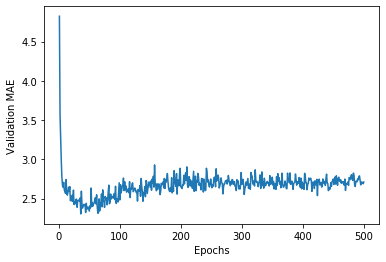

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

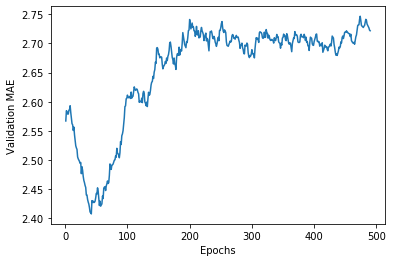

In [34]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [35]:
model = build_model()
#Trains it on the entirety of the data
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 644us/sample - loss: 20.2145 - mae: 2.9543
